# Fetal Health Classification Project

## Description
Reduction of child mortality is a key indicator of human progress. This project focuses on assessing fetal health using Cardiotocograms (CTGs). The dataset contains features extracted from CTG exams, classified into three classes: Normal, Suspect, and Pathological. The goal is to build a machine learning model for fetal health classification.

<center>

![Fetal Image](https://miro.medium.com/v2/resize:fit:640/format:webp/1*rmj7B0EumeMHL4SiW6tD5Q.gif)

</center>


In [1]:
import os

# Change the current working directory to the specified path
os.chdir(r'C:\Users\wokra\Desktop\github\health')

# Print the current working directory
print(os.getcwd())


C:\Users\wokra\Desktop\github\health


### Initial Setup

In [16]:
import warnings

# Ignore warnings to enhance code readability in this context
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import colors
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler


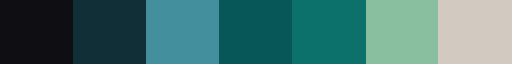

In [11]:
# Defining a custom color map for clusters using ListedColormap
palletecolors = colors.ListedColormap(['#0f0e13', '#112f37', '#438f9d', '#075758', '#0c716b', '#89bf9f', '#d2c9c0'])

# Displaying the custom color map
palletecolors

## Data Exploration

In [4]:
# Reading a CSV file named "fetal_health.csv" from the "data/raw" directory
df = pd.read_csv("data/raw/fetal_health.csv")

In [5]:
# Setting Pandas option to display all columns in DataFrames
pd.set_option('display.max_columns', None)


In [6]:
# Displaying the first few rows of the DataFrame to inspect its structure
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [7]:
# Providing information about the DataFrame's structure, column data types, and memory usage
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [9]:
# Generating descriptive statistics for numerical columns in the DataFrame
df.describe()


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,8.187629,70.445908,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,5.628247,38.955693,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,4.600000,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,7.400000,67.500000,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,10.800000,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,50.700000,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

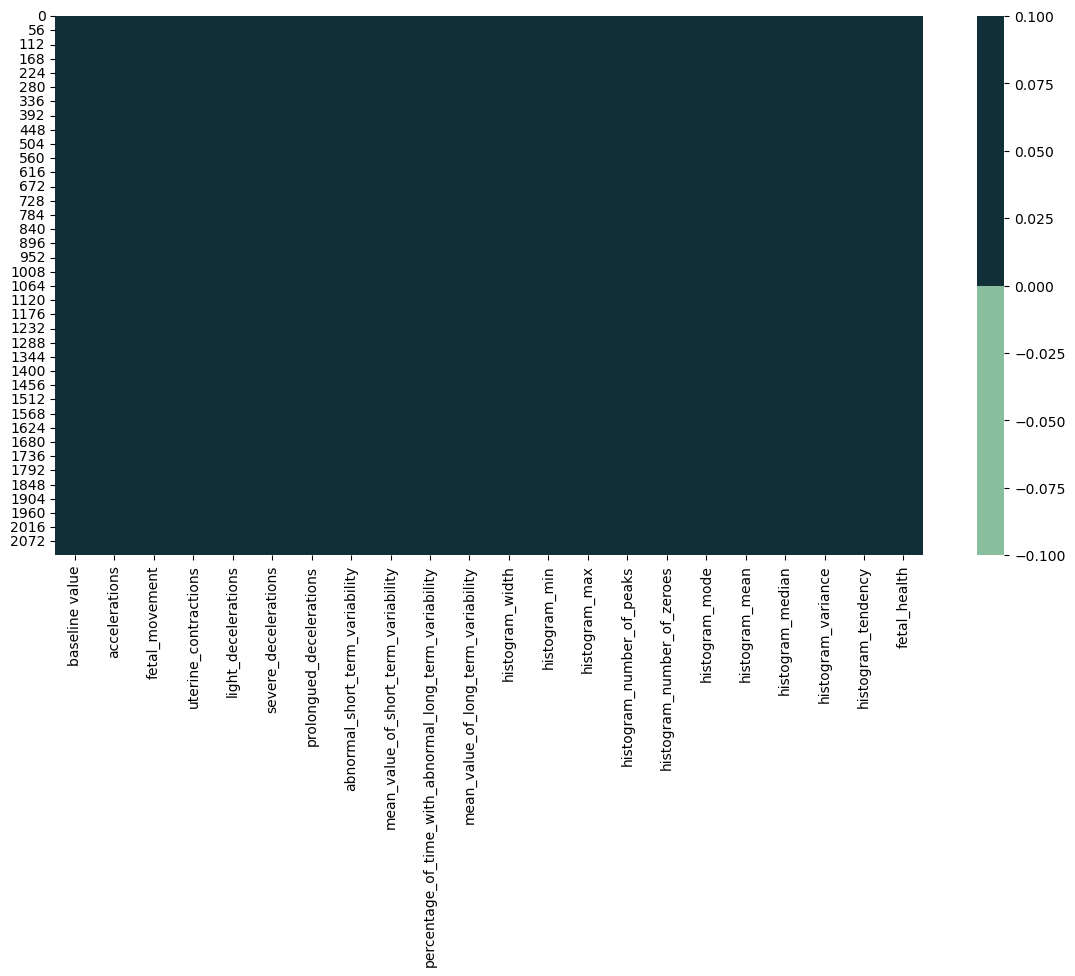

In [10]:
# Checking for missing values in the DataFrame and printing the sum of null values for each column
print(df.isnull().sum())

# Creating a heatmap to visualize missing values in the DataFrame
plt.figure(figsize=(14, 7))  # Setting the size of the heatmap figure
sns.heatmap(df.isnull(), cmap=['#89bf9f', '#112f37'])  # Plotting the heatmap with custom color mapping
plt.show()  # Displaying the heatmap

Text(0.5, 1.0, 'Correlation Analysis')

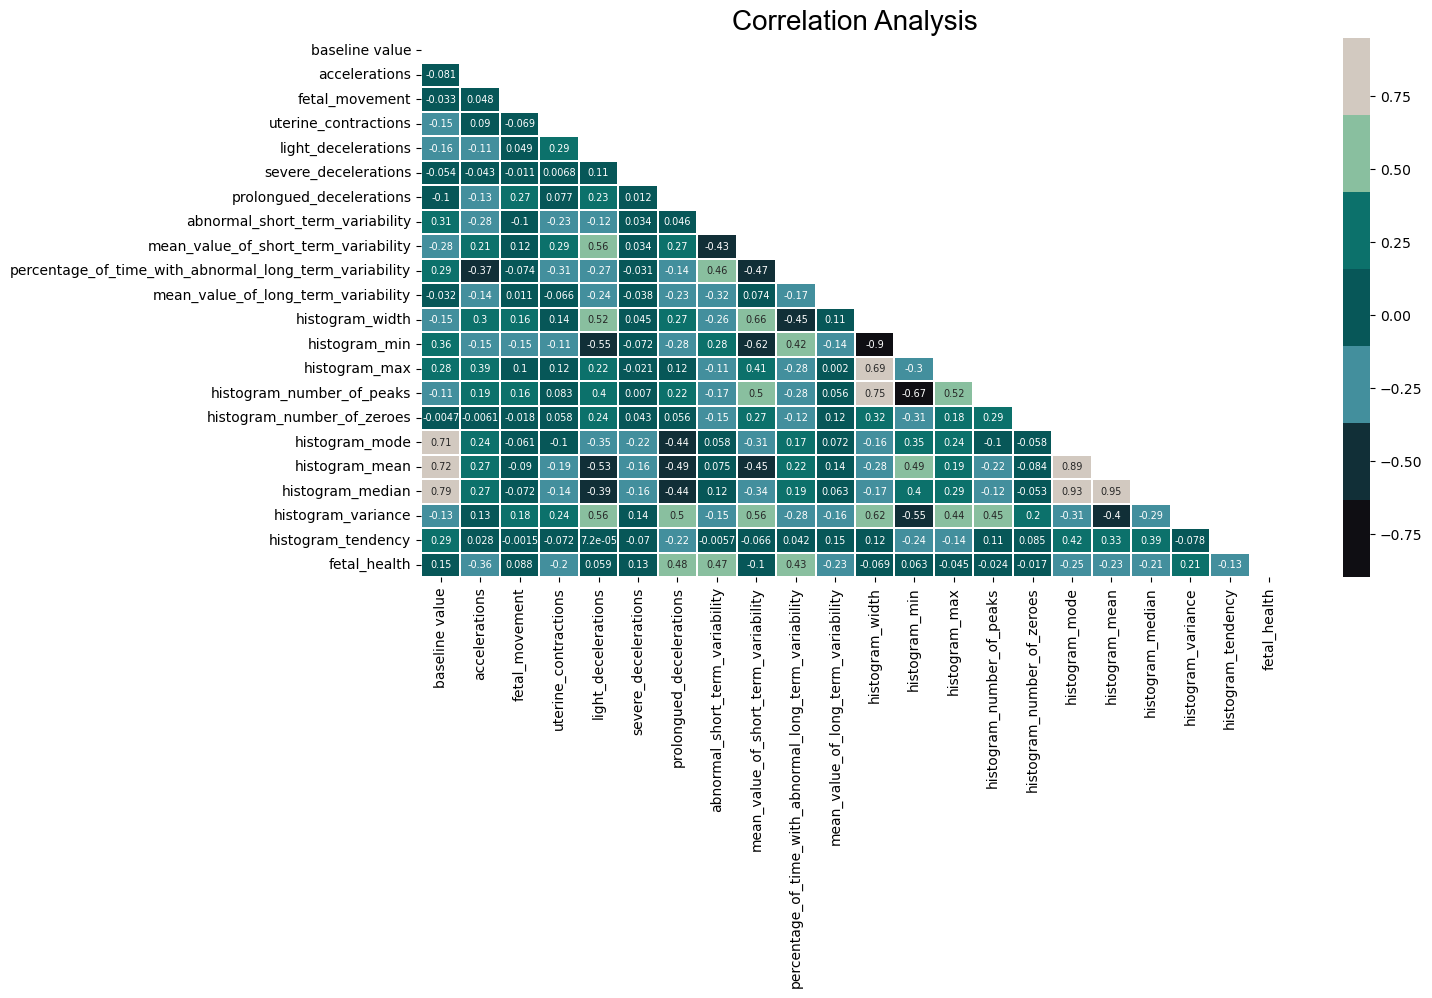

In [19]:
# Calculating the correlation matrix
df_corr = df.corr()

# Create the mask for the upper triangle of the new correlation matrix
mask = np.triu(np.ones_like(df_corr, dtype=bool))

# Create the heatmap using the new correlation matrix
fig, ax = plt.subplots(figsize=(14, 7))
sns.heatmap(df_corr, mask=mask, annot=True, cmap=palletecolors, linewidths=0.1, cbar=True, annot_kws={"size": 7})
plt.title('Correlation Analysis', fontsize=20, fontfamily='arial', loc='center')



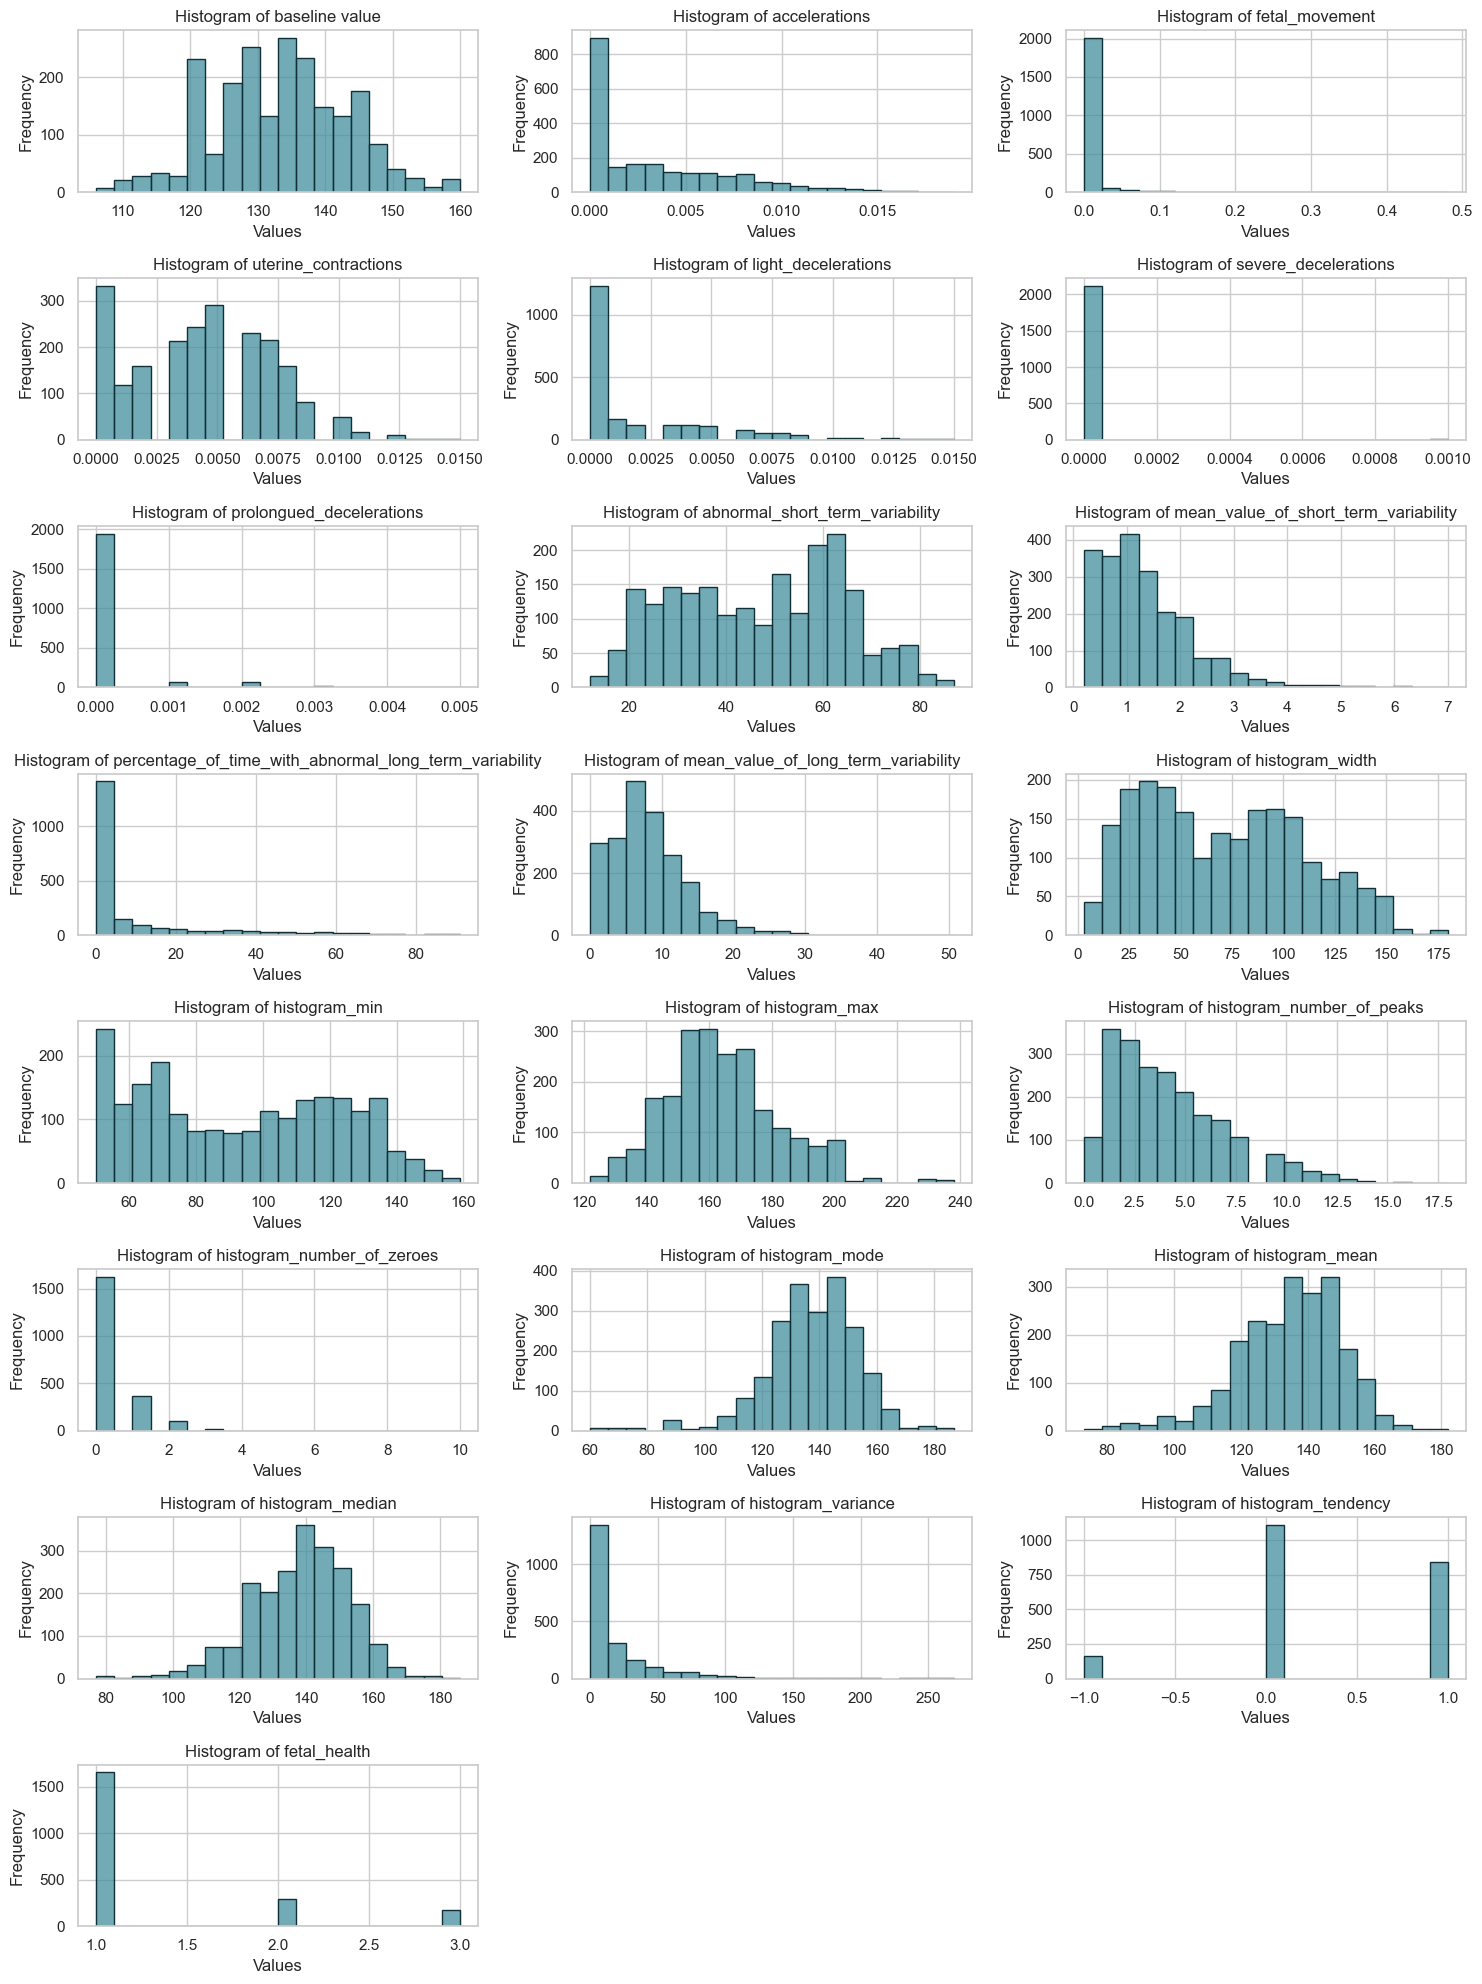

In [ ]:
# Configure Seaborn style (optional)
sns.set(style='whitegrid')

# Create a matrix of histograms
fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(15, 20))

# Iterate over each column and create a histogram in a matrix cell
for i, column in enumerate(df.columns):
    row_index = i // 3
    col_index = i % 3
    sns.histplot(df[column], bins=20, kde=False, color='#438f9d', edgecolor='#112f37', ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(f'Histogram of {column}')
    axes[row_index, col_index].set_xlabel('Values')
    axes[row_index, col_index].set_ylabel('Frequency')

# Turn off axes for cells exceeding the desired number of columns
for i in range(len(df.columns), 8 * 3):
    row_index = i // 3
    col_index = i % 3
    axes[row_index, col_index].axis('off')

# Display the matrix of histograms
plt.tight_layout()
plt.show()


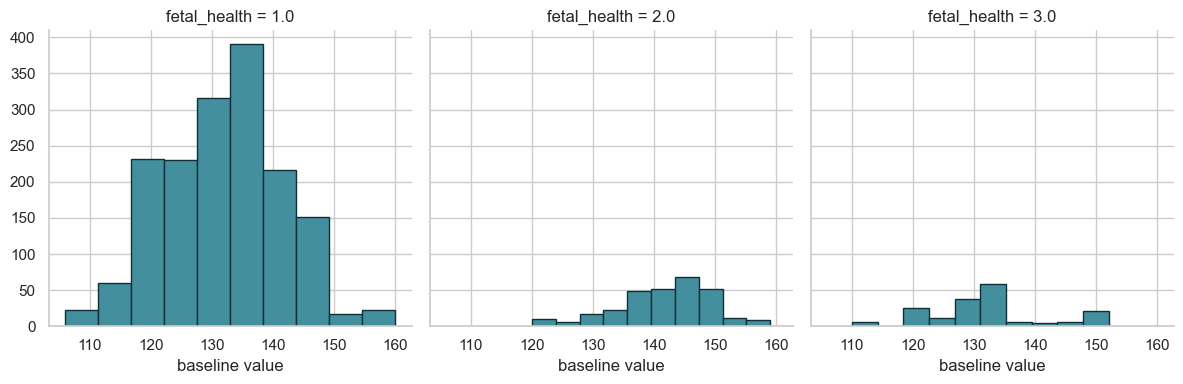

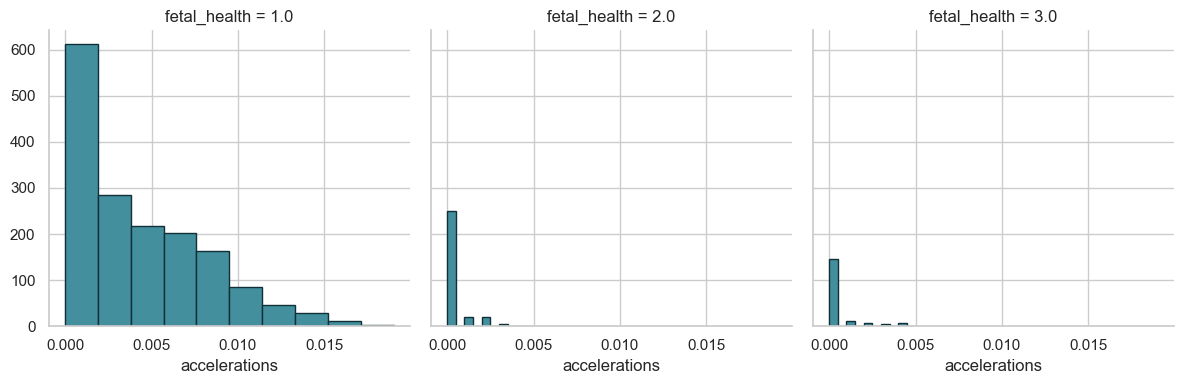

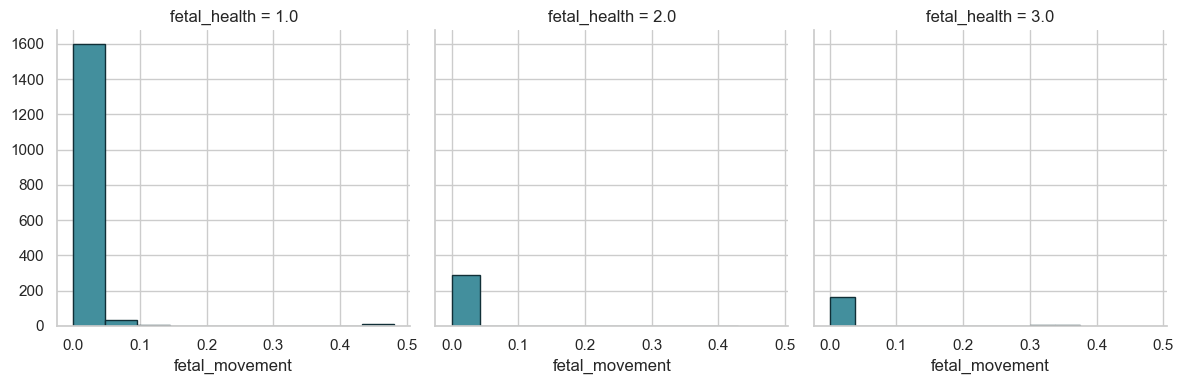

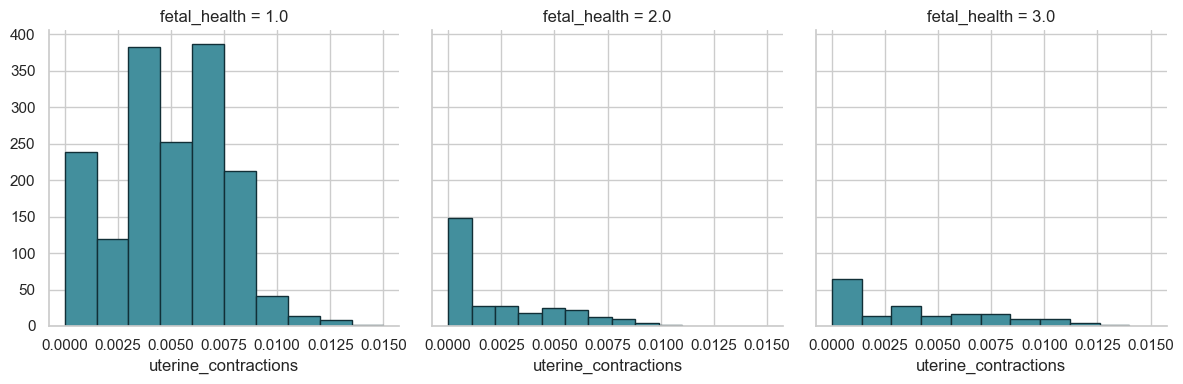

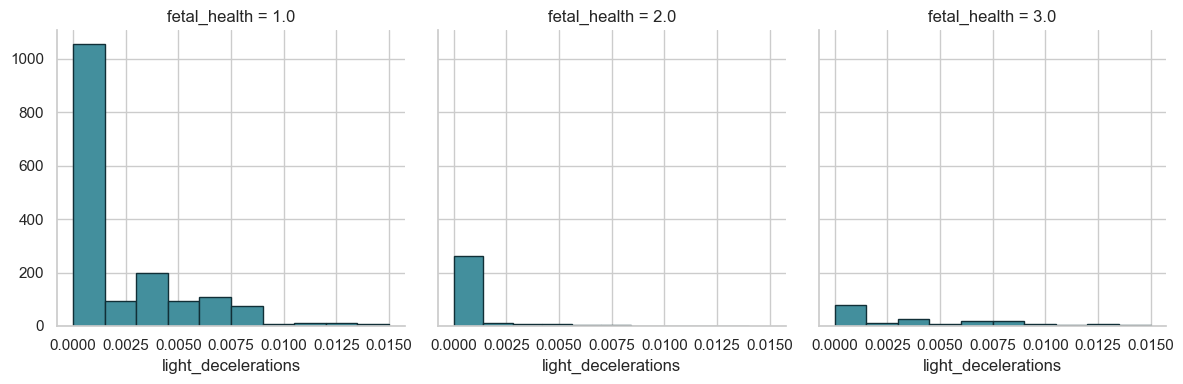

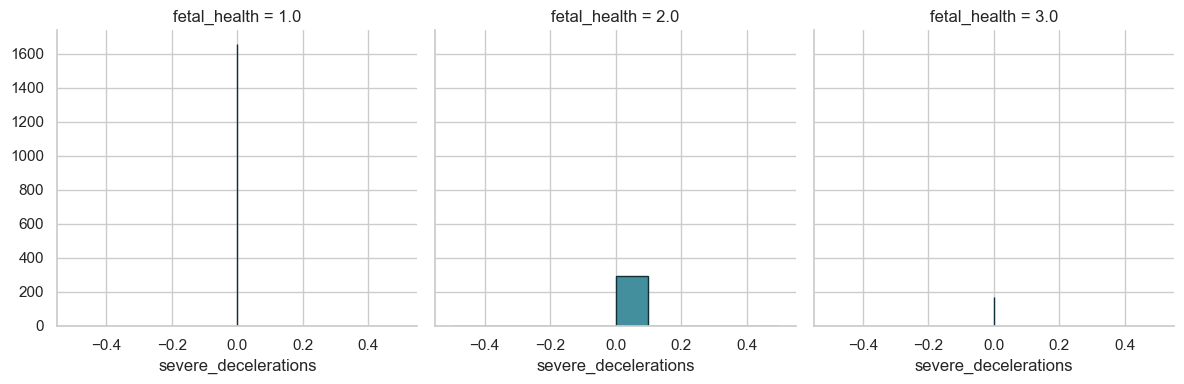

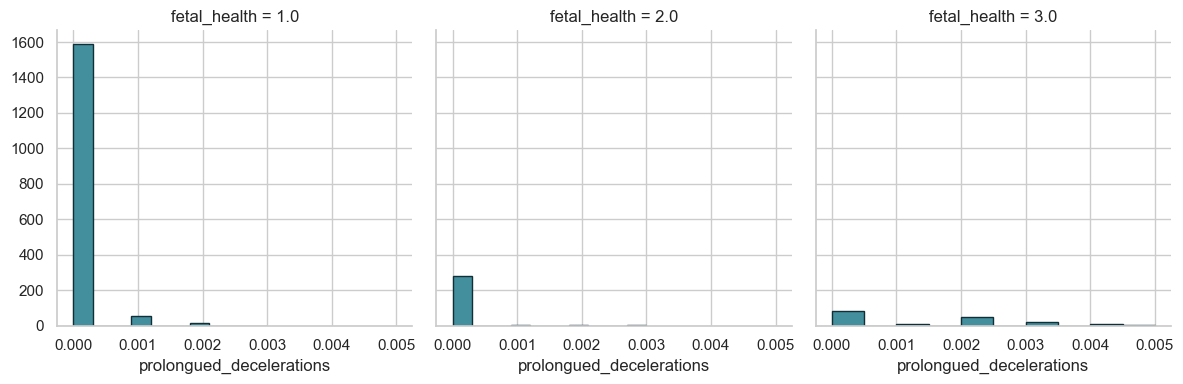

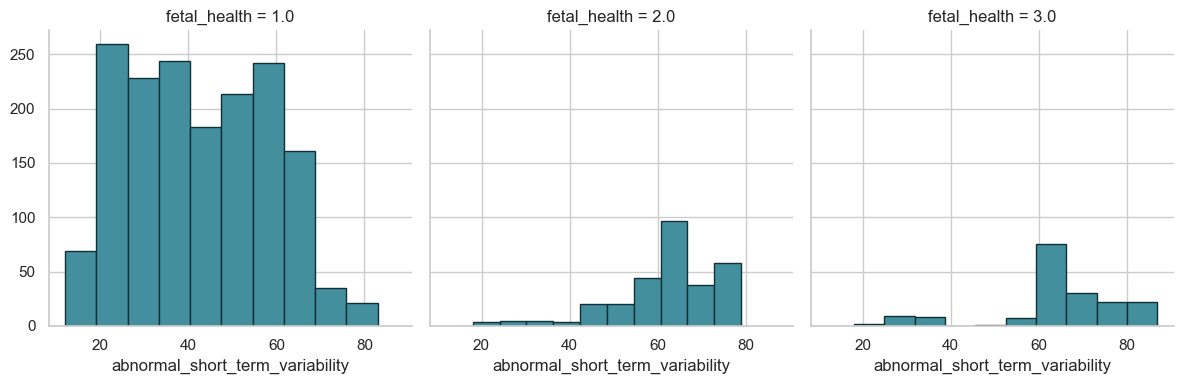

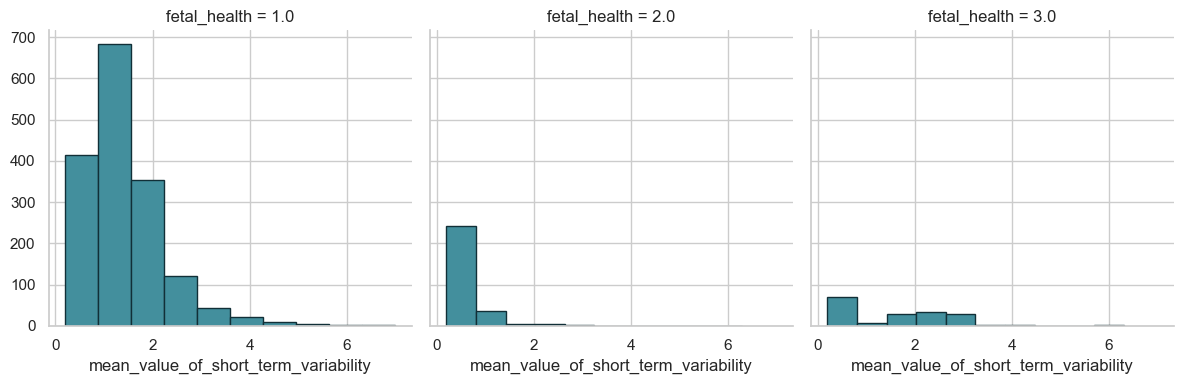

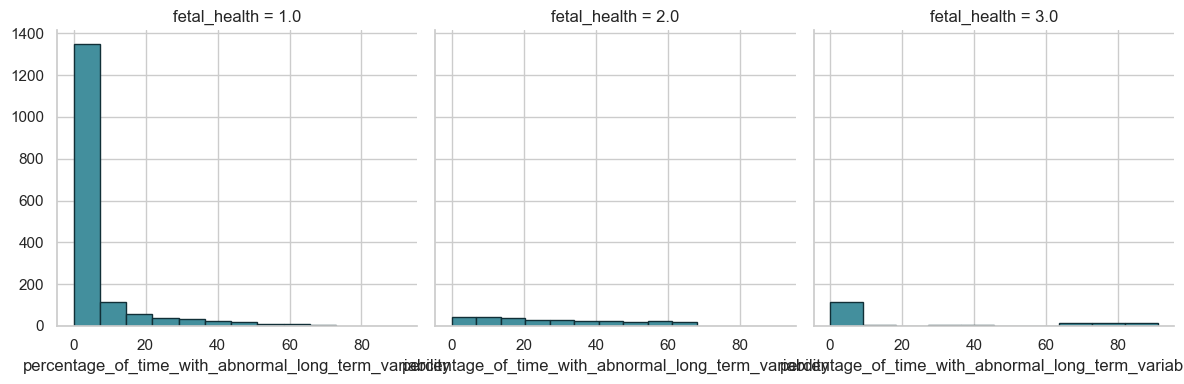

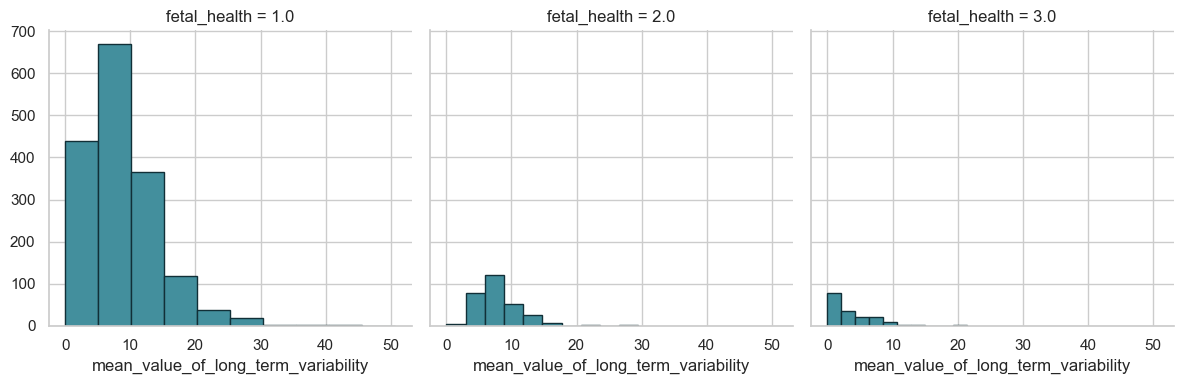

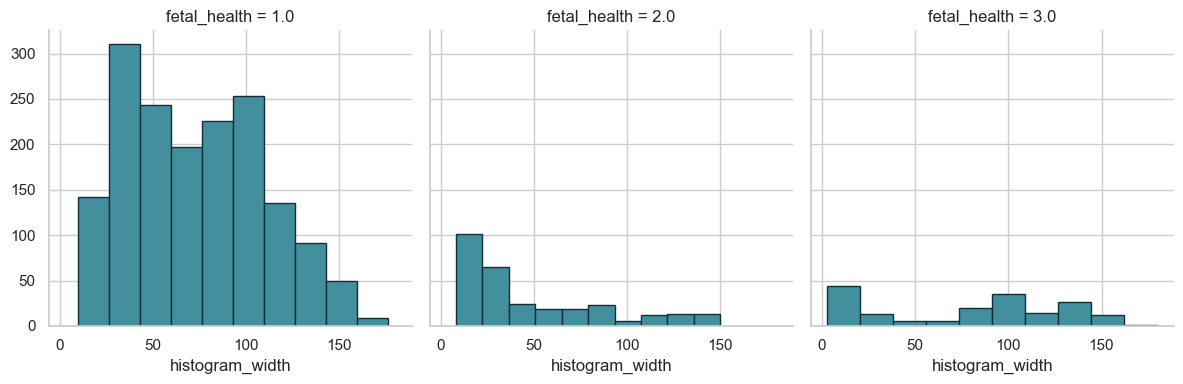

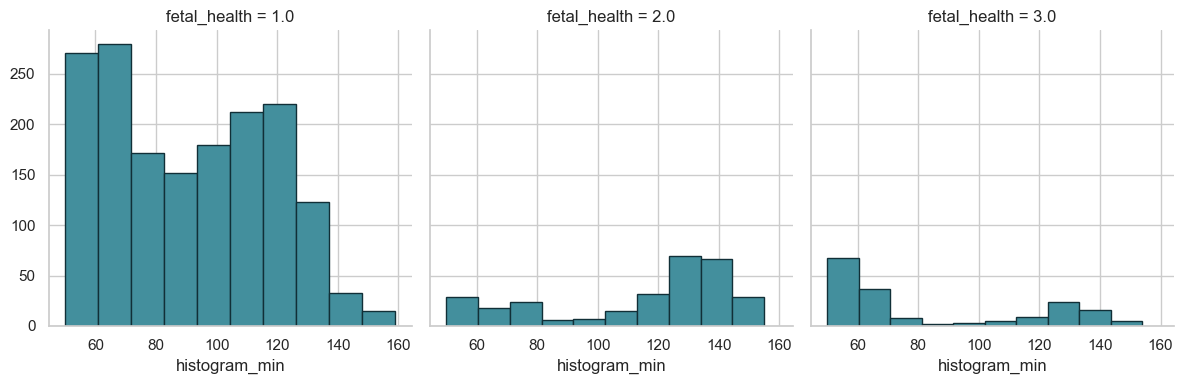

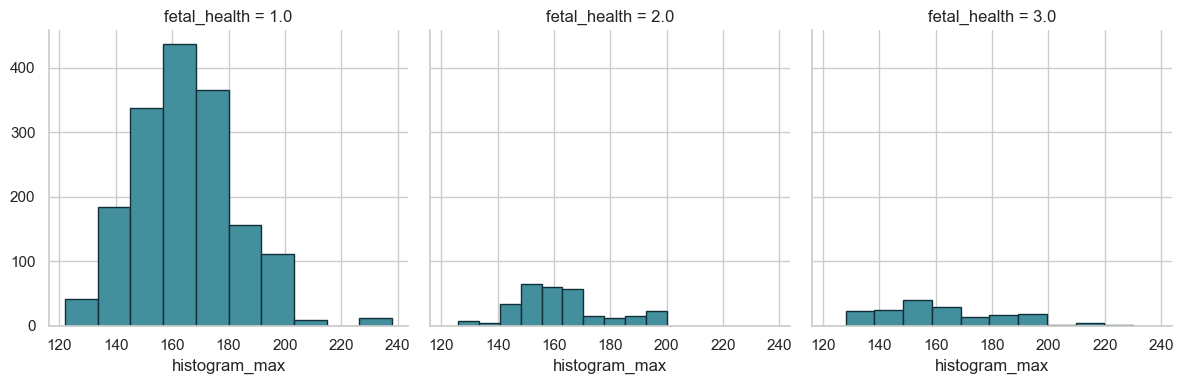

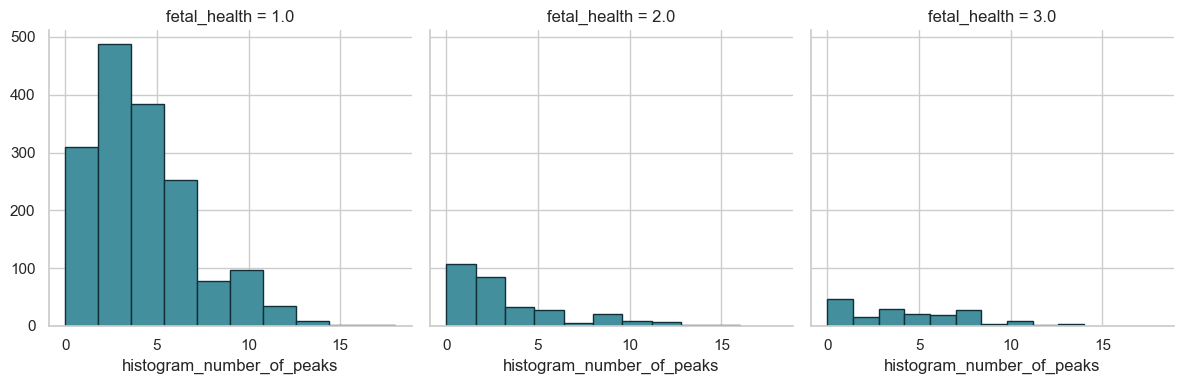

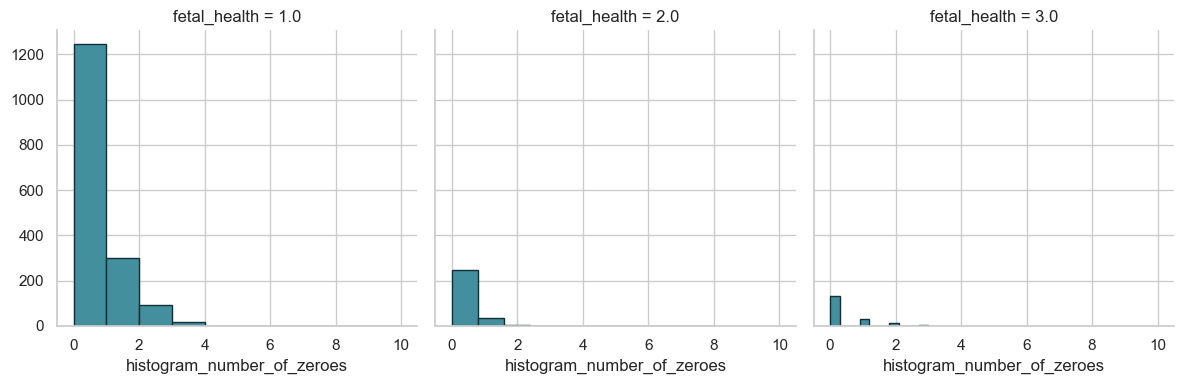

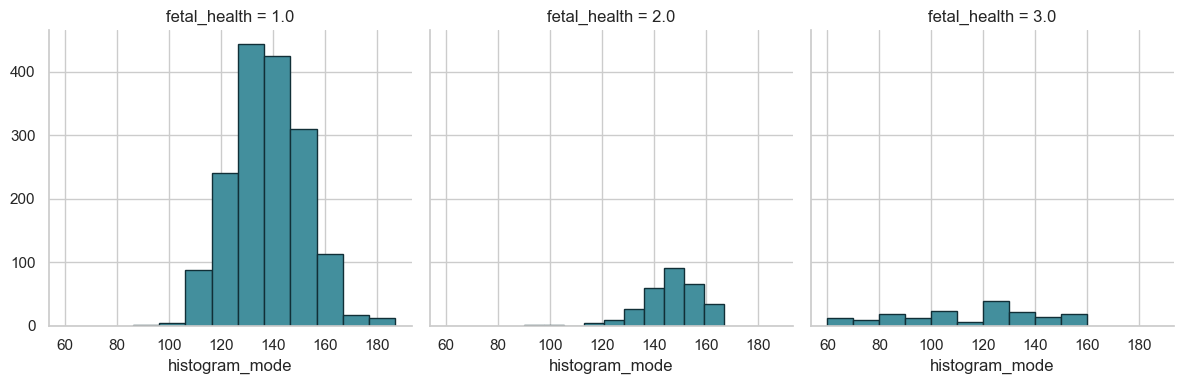

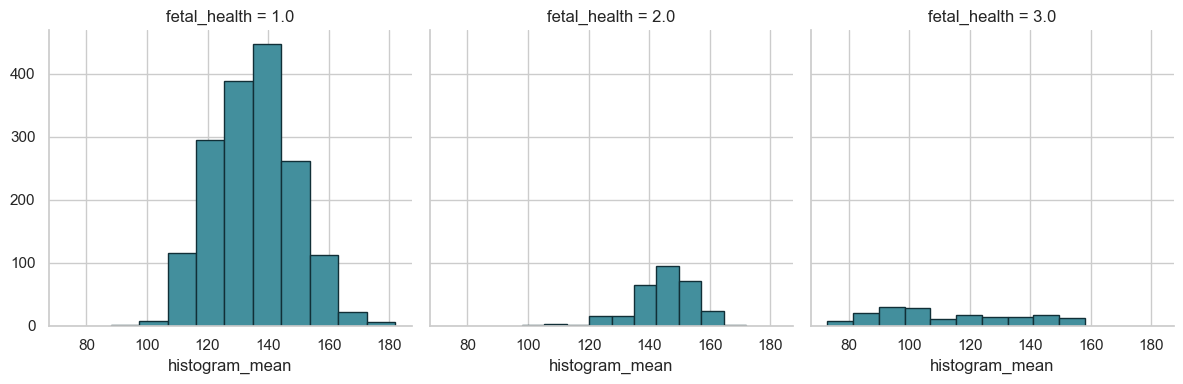

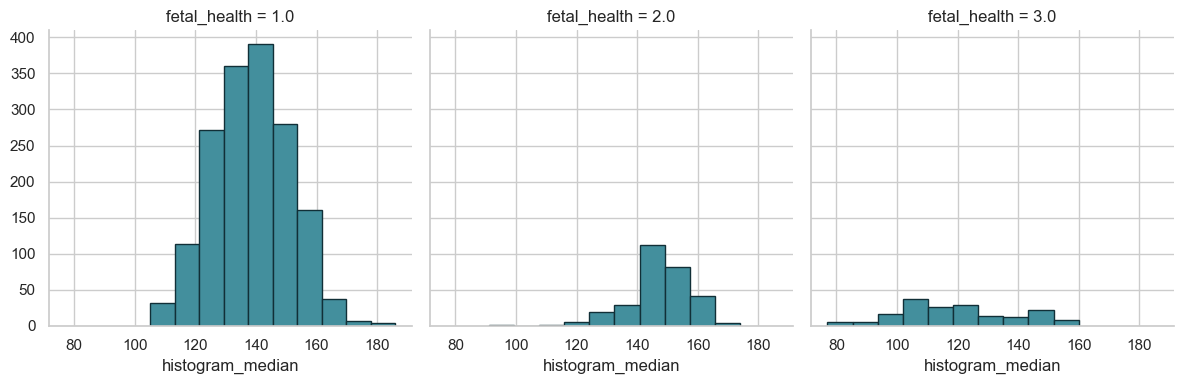

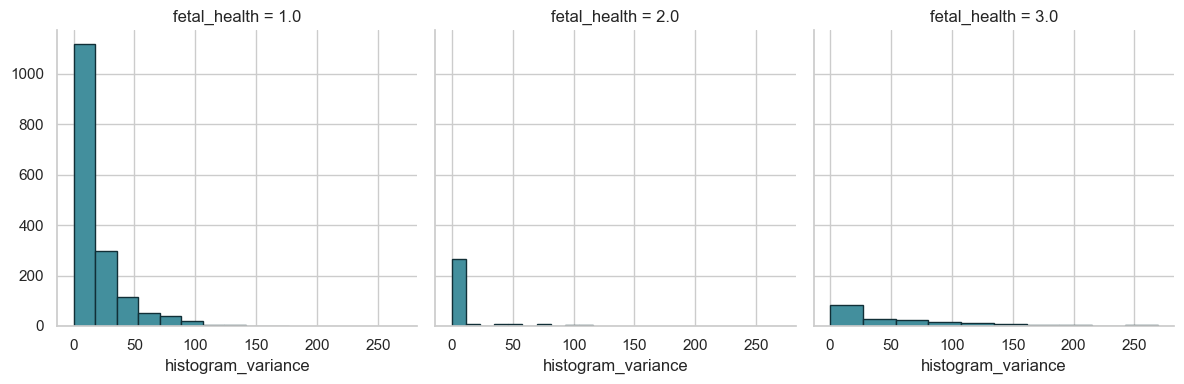

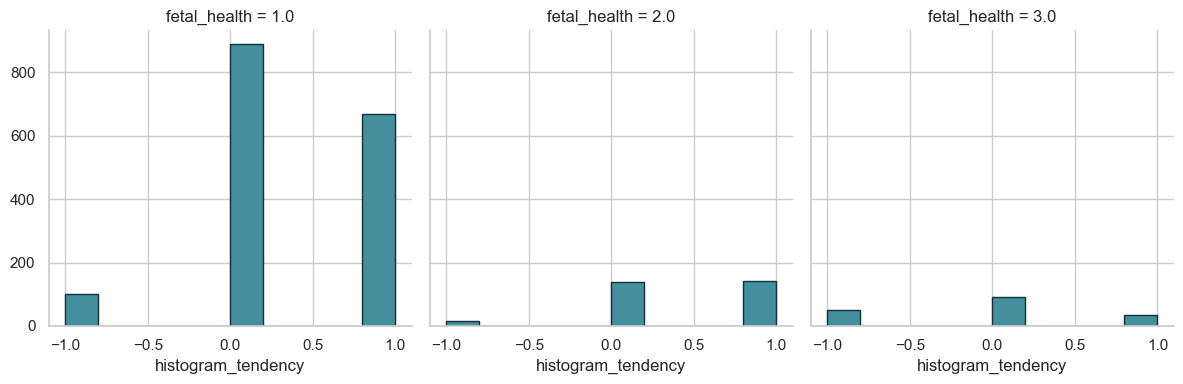

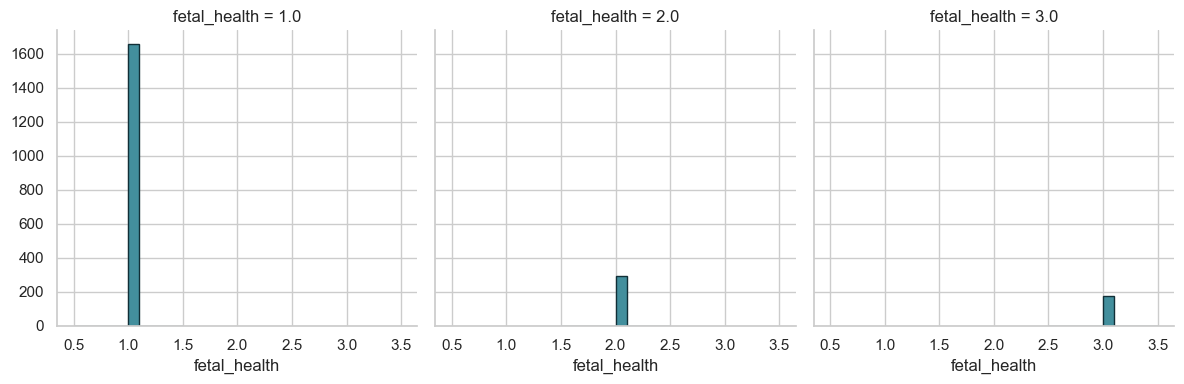

In [ ]:

# Create a FacetGrid for each feature with respect to the 'fetal_health' classes
for col in df.columns:
    g = sns.FacetGrid(df, col="fetal_health", height=4)
    g.map(plt.hist, col, color='#438f9d', edgecolor='#112f37')
    plt.tight_layout()
    plt.show()


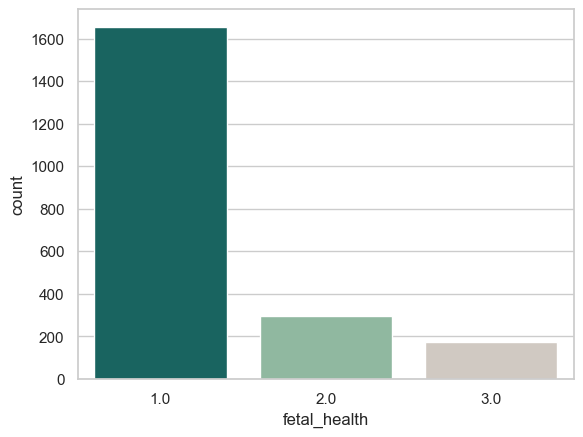

In [ ]:
# Define a list of colors for the countplot
colors = ['#0c716b', '#89bf9f', '#d2c9c0']

# Create a countplot for the 'fetal_health' column
sns.countplot(data=df, x="fetal_health", palette=colors)

# Show the plot
plt.show()


## Data Preprocessing

In [ ]:
# Convert the 'fetal_health' column to integer type
df["fetal_health"] = df["fetal_health"].astype(int)


In [ ]:
# Split the dataset into features (X) and target variable (y)
X = df.drop(["fetal_health"], axis=1)
y = df["fetal_health"]


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


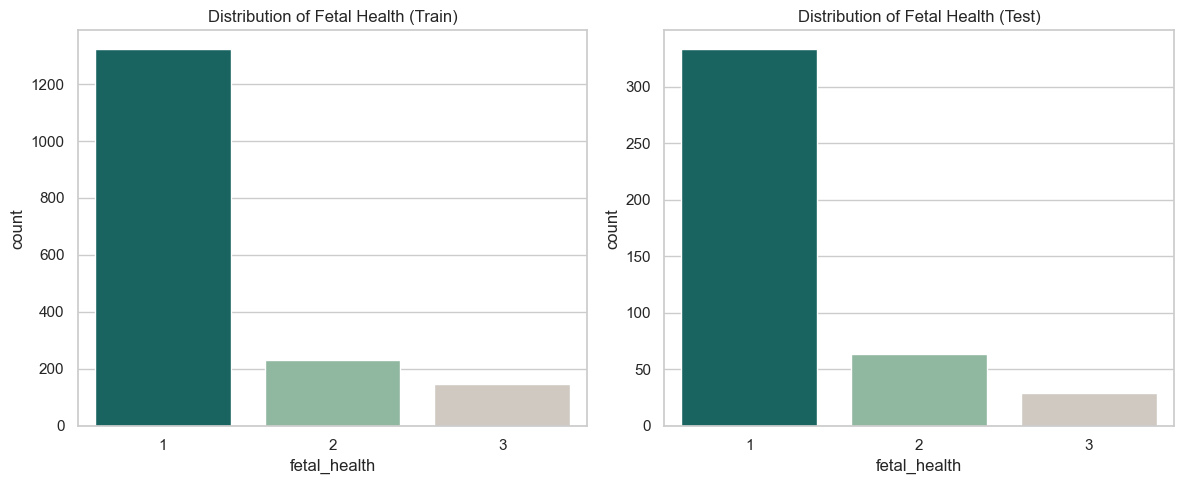

In [ ]:
# Set the color palette
cores = ['#0c716b', '#89bf9f', '#d2c9c0']

# Configure the subplot grid
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first graph (y_train)
sns.countplot(x=y_train, palette=cores, ax=axs[0])
axs[0].set_title("Distribution of Fetal Health (Train)")

# Plot the second graph (y_test)
sns.countplot(x=y_test, palette=cores, ax=axs[1])
axs[1].set_title("Distribution of Fetal Health (Test)")

# Adjust the layout
plt.tight_layout()

# Display the subplots
plt.show()


## Model Development

In [ ]:
# Define pipelines for different classifiers
pipeline_xgb = Pipeline([('xgb', XGBClassifier())])
pipeline_dt = Pipeline([('dt_classifier', DecisionTreeClassifier())])
pipeline_rf = Pipeline([('rf_classifier', RandomForestClassifier())])

# Create pipelines with LabelEncoder and StandardScaler
pipeline_xgb_with_scaler = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier())
])

pipeline_dt_with_scaler = Pipeline([
    ('scaler', StandardScaler()),
    ('dt_classifier', DecisionTreeClassifier())
])

pipeline_rf_with_scaler = Pipeline([
    ('scaler', StandardScaler()),
    ('rf_classifier', RandomForestClassifier())
])

# Dictionary to map indices to algorithm names
pipe_dict = {0: 'XGBoost', 1: 'Decision Tree', 2: 'RandomForest'}

# List of pipelines without StandardScaler
pipelines = [pipeline_xgb, pipeline_dt, pipeline_rf]

# List of pipelines with StandardScaler
pipelines_scaled = [pipeline_xgb_with_scaler, pipeline_dt_with_scaler, pipeline_rf_with_scaler]

# Train pipelines without StandardScaler
for pipe in pipelines:
    if pipe == pipeline_xgb:
        le = LabelEncoder()
        y_encode = pd.Series(le.fit_transform(y_train), index=y_train.index)
        pipe.fit(X_train, y_encode)
    else:
        pipe.fit(X_train, y_train)

# Train pipelines with StandardScaler
for pipe in pipelines_scaled:
    X_train_scaled = pipe.named_steps['scaler'].fit_transform(X_train)
    if pipe == pipeline_xgb_with_scaler:
        le = LabelEncoder()
        y_encode = pd.Series(le.fit_transform(y_train), index=y_train.index)
        pipe.fit(X_train_scaled, y_encode)
    else:
        pipe.fit(X_train_scaled, y_train)

## Results and Visualization


In [ ]:
# List to store cross-validation scores for each model
accuracy = []

# Perform cross-validation for each model
for i, model in enumerate(pipelines):
    if model == pipeline_xgb:
        le = LabelEncoder()
        y_encode = pd.Series(le.fit_transform(y_train), index=y_train.index)
        cv_score = cross_val_score(model, X_train, y_encode, cv=10)
        accuracy.append(cv_score)
        print("%s: %f " % (pipe_dict[i], cv_score.mean()))
    else:
        cv_score = cross_val_score(model, X_train, y_train, cv=10)
        accuracy.append(cv_score)
        print("%s: %f " % (pipe_dict[i], cv_score.mean()))


XGBoost: 0.941176 
Decision Tree: 0.907059 
RandomForest: 0.939412 


In [ ]:
# List to store cross-validation scores for each scaled model
accuracy = []

# Perform cross-validation for each scaled model
for i, model in enumerate(pipelines_scaled):
    if model == pipeline_xgb_with_scaler:
        le = LabelEncoder()
        y_encode = pd.Series(le.fit_transform(y_train), index=y_train.index)
        cv_score = cross_val_score(model, X_train_scaled, y_encode, cv=10)
        accuracy.append(cv_score)
        print("Scaled %s: %f " % (pipe_dict[i], cv_score.mean()))
    else:
        cv_score = cross_val_score(model, X_train_scaled, y_train, cv=10)
        accuracy.append(cv_score)
        print("Scaled %s: %f " % (pipe_dict[i], cv_score.mean()))


Scaled XGBoost: 0.941176 
Scaled Decision Tree: 0.912353 
Scaled RandomForest: 0.936471 


In [ ]:
# Use LabelEncoder to encode the target variable
le = LabelEncoder()
y_train = pd.Series(le.fit_transform(y_train), index=y_train.index)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [150, 500, 750],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Create the XGBoost classifier
xgb = XGBClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150}


In [ ]:
# Use LabelEncoder to encode the test target variable
le = LabelEncoder()
y_test = pd.Series(le.fit_transform(y_test), index=y_test.index)

# Create an XGBoost classifier with the best parameters from GridSearchCV
xgb = XGBClassifier(**grid_search.best_params_)

# Fit the XGBoost classifier to the training data
xgb.fit(X_train, y_train)

# Make predictions on the test set
predictions = xgb.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, predictions)
accuracy


0.9577464788732394

In [ ]:
# Custom label transformation function
def transform_labels(labels):
    return labels + 1


In [ ]:
# Transforming predicted and true labels using the custom function
predictions = transform_labels(predictions)
y_test = transform_labels(y_test)


In [ ]:
# Printing the classification report
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           1       0.98      0.97      0.97       333
           2       0.88      0.88      0.88        64
           3       0.94      1.00      0.97        29

    accuracy                           0.96       426
   macro avg       0.93      0.95      0.94       426
weighted avg       0.96      0.96      0.96       426



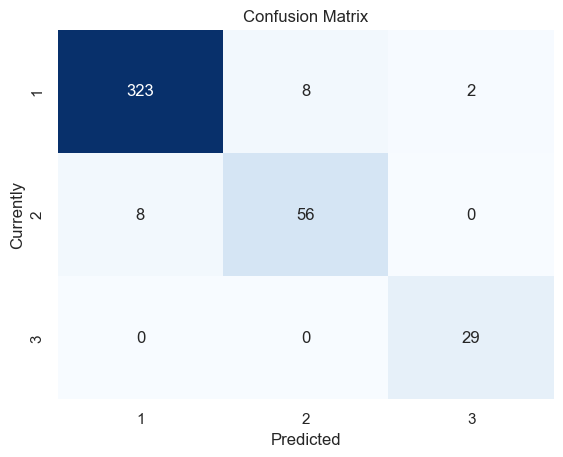

In [ ]:
# Creating a confusion matrix using pd.crosstab and displaying it with a heatmap
confusion_df = pd.crosstab(index=y_test, columns=predictions, colnames=['Predicted'], rownames=['Currently'])
sns.heatmap(confusion_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.show()


## Conclusion

The classification model performed well on the fetal health dataset, achieving an overall accuracy of 96%. The precision, recall, and F1-score metrics were also satisfactory for each class, demonstrating the model's ability to correctly identify instances from different classes.

### Class 1:
- Precision: 98%
- Recall: 97%
- F1-score: 97%

### Class 2:
- Precision: 88%
- Recall: 88%
- F1-score: 88%

### Class 3:
- Precision: 94%
- Recall: 100%
- F1-score: 97%

The macro-average F1-score was 94%, indicating a good balance between precision and recall across all classes. The weighted average F1-score was also 96%, reflecting the model's robust performance across the dataset.

In conclusion, the developed machine learning model, particularly an XGBoost classifier with optimized hyperparameters, demonstrated effectiveness in predicting fetal health, contributing to the overall goal of reducing child and maternal mortality.
